## Clasificacion Binaria

Se buscara la solución a un problema de clasificacion binaria, donde se busca encontrar si un cliente es un posible comprador de depositos a plazos fijos, esto para una equipo de una campañar de publicidad.

El dataset a usar se encuentra en el siguiente link:
- https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

In [1]:
import pandas as pd
url_csv = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'


In [2]:
data = pd.read_csv(url_csv, sep=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Printing the shape of the data
print(data.shape)

(45211, 17)


In [6]:
# Summarizing the statistics of the numerical raw data
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Prueba de hipotesis con visualizacion de los datos

#### Hipotesis -> Factor de edad indica si un cliente es mas propenso a comprar un prestamo a plazo

Clientes con mayor edad son mas propensos de comprar un prestamos a plazo que los menores

In [9]:
import altair as alt 

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.

Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly. 
https://altair-viz.github.io/getting_started/overview.html 

* Nos permite generar Mapas interactivos 😎

In [10]:
#Agrupamos los datos por edad y filtramos todos los que esten catalogados como que si compraron
filter_mask = data['y'] == 'yes'
bankSub1 = data[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [11]:
bankSub1.head()

,age,agegrp
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


In [12]:
# Visualising the relationship using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

Con esto podemos darnos cuenta que nuestra hipotesis es un poco contradictoria, ya que las personas que mas compran estos prestamos se encuentran entre los los 25 y 40 años aproximadamente. **Pero esto es un poco engañoso! Ya que no estamos considerando proporciones, puede ser que tenemos mas clientes de esta edad y por eso dicho resultado**

Para abordar este problema debemos ver desde otra perspectiva, viendo las proporciones de los clientes

In [13]:
# Getting another perspective
ageTot = data.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


Aqui podemos ver cuantos clientes tenemos agrupados por edad, sin importar si compraron o no

In [14]:
# Agrupando por edad y por la decision si compraron o no 
ageProp = data.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [15]:
#Hacemos un join de las tablas por edad y sacamos la proporcio de cuantos compraron contra el total
ageComb = pd.merge(ageProp, ageTot,left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


Ahora graficaremos las proporciones de cada categoria (si y no) en graficas separadas con un metodo de altair `facet()`


In [16]:
# Visualising the relationship using altair
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

In [19]:
ageComb[ageComb.age>80]

,age,y,ageCat,ageTot,catProp
126,81,no,11,17,64.705882
127,81,yes,6,17,35.294118
128,82,no,11,19,57.894737
129,82,yes,8,19,42.105263
130,83,no,16,22,72.727273
131,83,yes,6,22,27.272727
132,84,no,4,9,44.444444
133,84,yes,5,9,55.555556
134,85,no,1,5,20.000000
135,85,yes,4,5,80.000000


### ACTIVIDAD

#### 2da Hipotesis -> Estado actual del empleo (categoria de empleado) vs propensiad a comprar prestamos a plazos

In [23]:
#Agrupamos los datos por estado del empleo y filtramos todos los que esten catalogados como que si compraron
filter_mask = data['y'] == 'yes'
data_job_grouped = data[filter_mask].groupby('job')['y'].agg(jobTot='count').reset_index()

In [24]:
data_job_grouped.head()

,job,jobTot
0,admin.,631
1,blue-collar,708
2,entrepreneur,123
3,housemaid,109
4,management,1301


In [25]:
# Visualising the relationship using altair
alt.Chart(data_job_grouped).mark_line().encode(x='job', y='jobTot')

alt.Chart(...)

En este punto parece que los que tienden mas a comprar este tipo de prestamos son los encargados adminitrativos, retirado y tecnicos, pero como en el ejercicio anterior debemos calcular las proporciones

In [27]:
# Getting another perspective
# Cuantas personas tenemos por categoria de trabajo
jobTot = data.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot.head()

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458


In [26]:
# Agrupando por trabajo y por la decision si compraron o no 
jobProp = data.groupby(['job','y'])['y'].agg(jobCat='count').reset_index()
jobProp.head()

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364


In [29]:
#Hacemos un join de las tablas por trabajo y sacando la proporcio de cuantos compraron contra el total
jobComb = pd.merge(jobProp, jobTot,left_on = ['job'], right_on = ['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100
jobComb.head()

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


In [30]:
# Visualising the relationship using altair
alt.Chart(jobComb).mark_line().encode(x='job', y='catProp').facet(column='y')

alt.FacetChart(...)

Usando la misma tecnica que en el ejercico anterior podemos ver que es claro que mucha gente no compra estos prestamos, pero las categorias que muestran mayor tendencia a compra son los estudiantes y los retirados, seguido de los sin empleo.

Para visualizar los datos de otra forma, usaremos una grafica de barras apilada.

In [37]:
len(jobComb[jobComb.y == 'yes'].job)

12

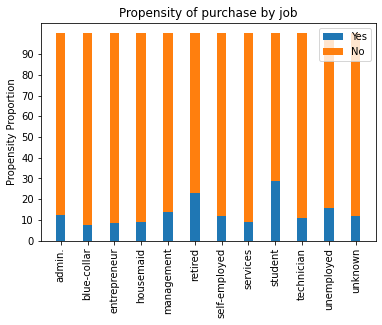

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Get the length of x axis labels and arranging its indexes
xlabels = len(jobComb[jobComb.y == 'yes'].job)
ind = np.arange(xlabels) #A diferencia de range nos puede devoler una lista de numeros no enteros

# Get width of each bar
width = 0.35

# Getting the plots
p1 = plt.bar(ind, jobComb[jobComb.y == 'yes'].catProp , width)
p2 = plt.bar(ind, jobComb[jobComb.y == 'no'].catProp, width, bottom=jobComb[jobComb.y == 'yes'].catProp)

# Getting the labels for the plots 
plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, jobComb[jobComb.y == 'yes'].job)
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels
plt.xticks(rotation=90)
plt.show()